In [1]:
import os
import math
import numpy as np
from gnss_ins_sim.gnss_ins_sim.sim import imu_model
from gnss_ins_sim.gnss_ins_sim.sim import ins_sim
%matplotlib inline

In [2]:
# Global variables

motion_def_file = os.path.abspath('.//motion_def1.csv')

# Define sample frequencies
fs = 100.0 
fs_gps = 10.0
fs_mag = fs

In [3]:
def test_path_gen():
    '''
    test only path generation in Sim.
    '''
    #### choose a built-in IMU model
    imu_err = 'low-accuracy'
    
    # Note that here we can define a new model based on specs from a specific IMU
    imu_microstrain = {
                # gyro bias, deg/hr
                'gyro_b': np.array([0.0, 0.0, 0.0]),
                # gyro angle random walk, deg/rt-hr
                'gyro_arw': np.array([0.25, 0.25, 0.25]),
                # gyro bias instability, deg/hr
                'gyro_b_stability': np.array([8.0, 8.0, 8.0]),
                # gyro bias instability correlation, sec.
                # set this to 'inf' to use a random walk model
                # set this to a positive real number to use a first-order Gauss-Markkov model
                'gyro_b_corr': np.array([100.0, 100.0, 100.0]),
                # accelerometer bias, m/s^2
                'accel_b': np.array([0.0e-3, 0.0e-3, 0.0e-3]),
                # accelerometer velocity random walk, m/s/rt-hr
                'accel_vrw': np.array([0.03119, 0.03009, 0.04779]),
                # accelerometer bias instability, m/s^2
                'accel_b_stability': np.array([4.29e-5, 5.72e-5, 8.02e-5]),
                # accelerometer bias instability correlation, sec. Similar to gyro_b_corr
                'accel_b_corr': np.array([200.0, 200.0, 200.0]),
                # magnetometer noise std, uT
                'mag_std': np.array([0.2, 0.2, 0.2])
              }
    
    # generate GPS and magnetometer data
    imu = imu_model.IMU(accuracy=imu_err, axis=9, gps=True)

    #### start simulation
    sim = ins_sim.Sim([fs, fs_gps, fs_mag],
                      motion_def_file,
                      ref_frame=0,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(1)
    # save simulation data to files
    sim.results('')
    # plot data, 3d plot of reference positoin, 2d plots of gyro and accel
    sim.plot(['ref_pos', 'gyro', 'accel', 'ref_gps'], opt={'ref_pos': '3d'})


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 542.5 s
Simulation runs: 1

------------------------------------------------------------
Simulation results are saved to /Users/bdavis/Documents/EEL5934_CA&MC/Project/workspace/demo_saved_data/2023-11-28-16-14-11
The following results are saved:
	time: sample time
	ref_pos: true LLA pos in the navigation frame
	ref_vel: true vel in the NED frame
	ref_att_euler: true attitude (Euler angles, ZYX)
	ref_accel: true accel in the body frame
	ref_gyro: true angular velocity in the body frame
	gps_time: GPS sample time
	ref_gps: true GPS LLA position and NED velocity
	gps_visibility: GPS visibility
	ref_mag: true magnetic field in the body frame
	accel: accel measurements
	gyro: gyro measurements
	gps: GPS LLA position and NED velocity measurements
	mag: magnetometer measurements
	ref_att_quat: true attitude (quaternion)



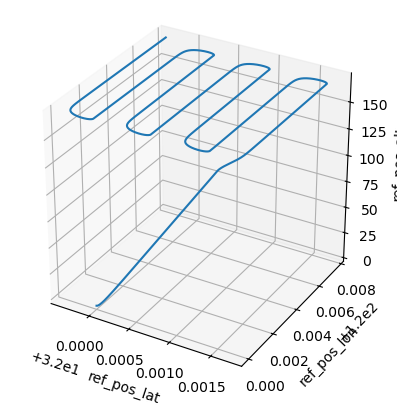

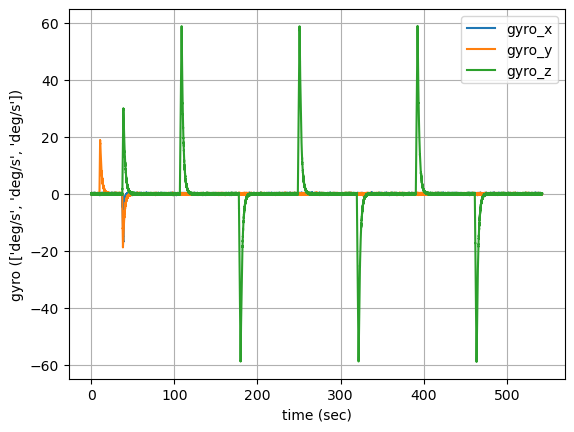

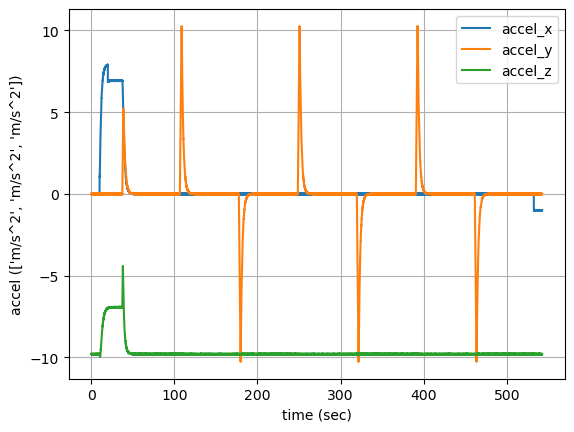

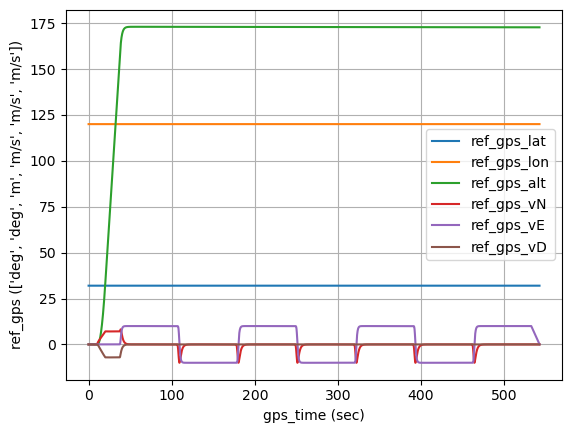

In [4]:
if __name__ == '__main__':
    test_path_gen()